<a href="https://colab.research.google.com/github/Rik0808/Job_Posting_Classification/blob/main/Fake_Job_Postings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Case Study : Fake Job Postings

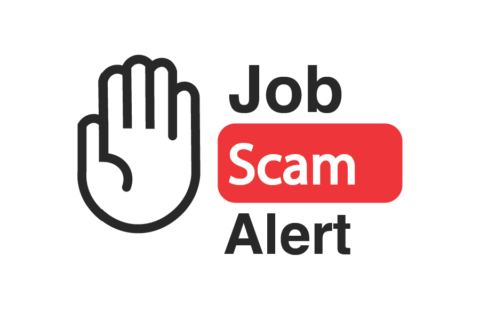

## **Intro and Overview of the Problem:**
The Internet is so full of fake articles, news, documents, and whatnot and the bad news is probably the number of such fake elements will only increase as we go along. Job postings have not been lucky enough to slip through the grip of this fake saga. Every day, thousands of Job requirements are posted and it is nearly impossible to manually check and understand which is fake and which isn't. On the other hand, it is also a very important issue to solve.

In this particular problem, I have tried to tackle the fake job posting issue with the help of classification techniques and NLP. The dataset has been taken from Kaggle and contributed to Kaggle by The University of the Aegean | Laboratory of Information & Communication Systems Security.

**Context**<br><br>
This dataset contains 18K job descriptions out of which about 800 are fake. The data consists of both textual information and meta-information about the jobs. The dataset can be used to create classification models which can learn the job descriptions which are fraudulent.

Let's start by importing necessary packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import missingno

# NLP Packages
import re
import nltk
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.stem import SnowballStemmer,PorterStemmer
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from scipy import stats\



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!gdown 1RBzC_85A1ILtrkAMOwh5EExx2o6KMv6F

Downloading...
From: https://drive.google.com/uc?id=1RBzC_85A1ILtrkAMOwh5EExx2o6KMv6F
To: /content/fake_job_postings.csv
100% 50.1M/50.1M [00:00<00:00, 154MB/s]


In [ ]:
df= pd.read_csv('fake_job_postings.csv')

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.shape

(17880, 18)

In [ ]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
def missing_data(df):
  absolute_missing = df.isnull().sum().sort_values(ascending = False)
  percentage_missing = np.round((df.isnull().sum() / df.shape[0] * 100), 2).sort_values(ascending = False)
  missing_dataframe = pd.concat([absolute_missing, percentage_missing], axis = 1, keys = ['Total Count', 'Percentage'])
  return missing_dataframe[missing_dataframe['Total Count'] > 0]

In [ ]:
missing_data(df)

,Total Count,Percentage
salary_range,15012,83.96
department,11547,64.58
required_education,8105,45.33
benefits,7210,40.32
required_experience,7050,39.43
function,6455,36.10
industry,4903,27.42
employment_type,3471,19.41
company_profile,3308,18.50
requirements,2695,15.07


In [ ]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


It is quite obvious that the numerical features have outliers . The difference between mean and median(50th percentile) is a proof of that.Job_id is quite insignificant in terms of predicting if a job posting is fake or not.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

## Uni-Variate Analysis

In [ ]:

df['fraudulent'].value_counts(normalize=True)

0    0.951566
1    0.048434
Name: fraudulent, dtype: float64

<Axes: xlabel='fraudulent', ylabel='count'>

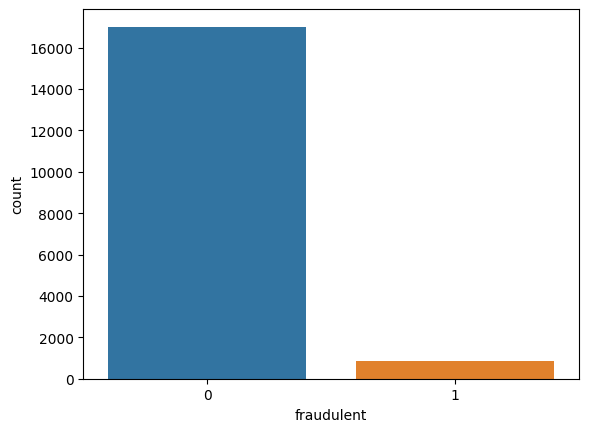

In [ ]:
sns.countplot(x=df['fraudulent'])

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['location'].value_counts()

GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
                        ... 
GB, SFK, Leiston           1
GB, LND, Hammersmith       1
US, WA, Seattle            1
BE                         1
GB, WSX, Chichester        1
Name: location, Length: 3105, dtype: int64

In [ ]:
df['salary_range'].value_counts()

0-0            142
40000-50000     66
30000-40000     55
25000-30000     37
45000-67000     37
              ... 
15-25            1
60-75            1
27500-36000      1
20-22            1
3700-3800        1
Name: salary_range, Length: 874, dtype: int64

In [ ]:
df['salary_range'].nunique()

874

In [ ]:
df['department'].value_counts()

Sales                                          551
Engineering                                    487
Marketing                                      401
Operations                                     270
IT                                             225
                                              ... 
Commercial Management / Contract Management      1
Exec                                             1
Marcomm                                          1
CRM                                              1
Hospitality                                      1
Name: department, Length: 1337, dtype: int64

In [ ]:
df['title'].value_counts()

English Teacher Abroad                                         311
Customer Service Associate                                     146
Graduates: English Teacher Abroad (Conversational)             144
English Teacher Abroad                                          95
Software Engineer                                               86
                                                              ... 
West Coast Regional Channel Manager (RCM)                        1
BI Practice Manager                                              1
Community Coordinator- Ambassador Programme                      1
Senior Traffic Engineer                                          1
Project Cost Control Staff Engineer - Cost Control Exp - TX      1
Name: title, Length: 11231, dtype: int64

In [ ]:
df['has_company_logo'].value_counts(normalize=True)

1    0.795302
0    0.204698
Name: has_company_logo, dtype: float64

Almost 80 percent of the companies have logo while 20 percent do not .

In [ ]:
df['telecommuting'].value_counts(normalize=True)

0    0.957103
1    0.042897
Name: telecommuting, dtype: float64

In [ ]:
df['employment_type'].value_counts()

Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

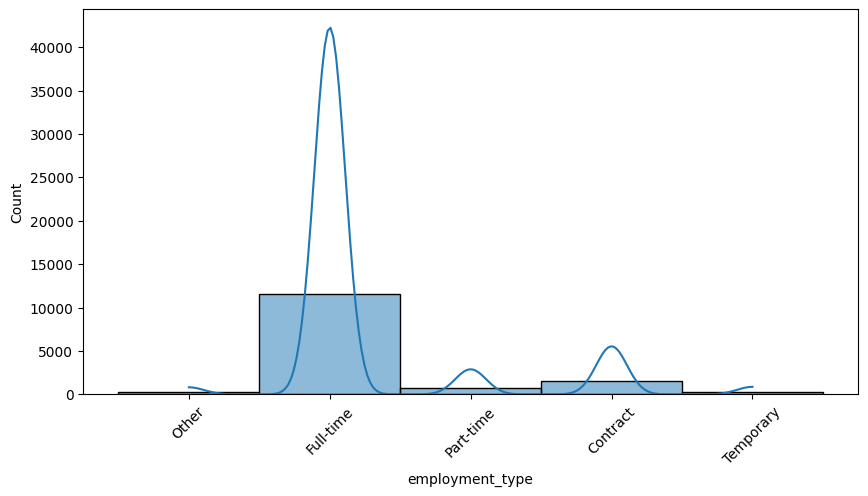

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['employment_type'],kde=True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['industry'].value_counts()

Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: industry, Length: 131, dtype: int64

In [ ]:
df['required_experience'].value_counts()

Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

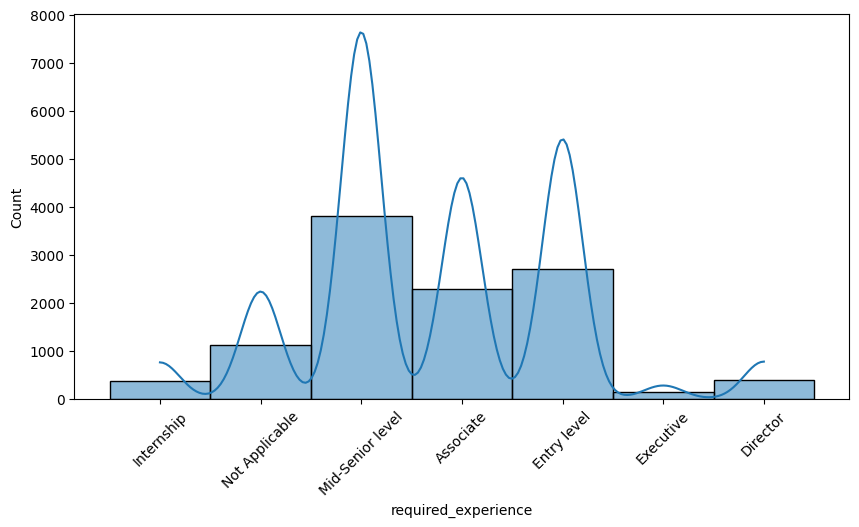

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['required_experience'],kde=True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['required_education'].value_counts()

Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

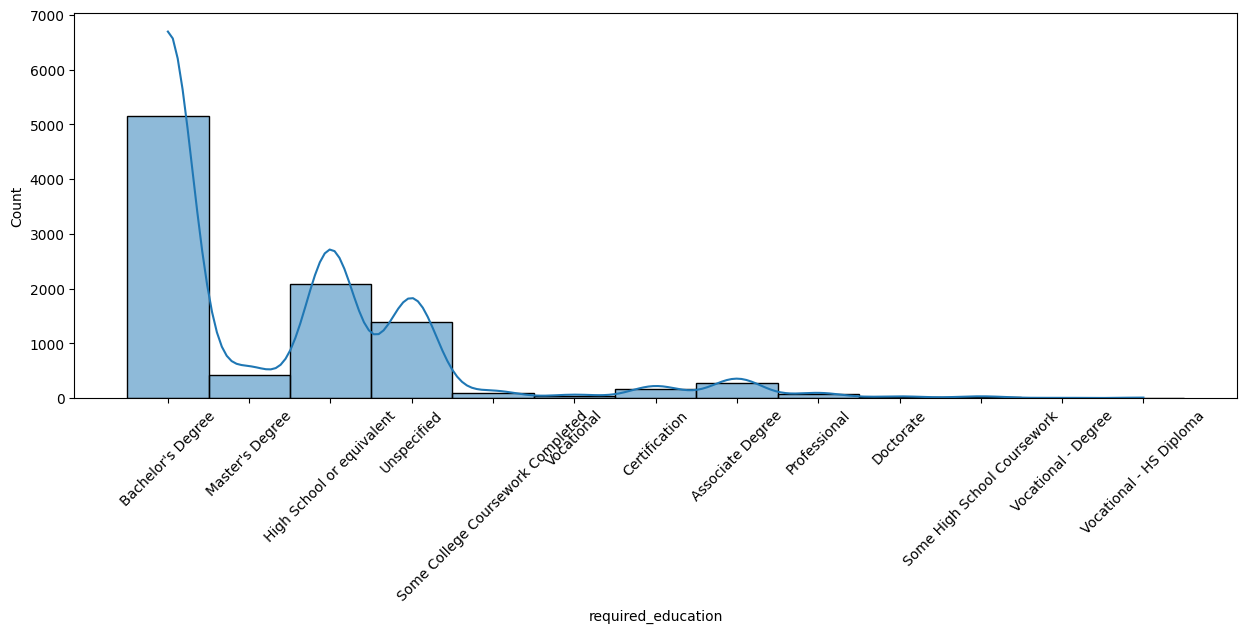

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(df['required_education'],kde=True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['function'].value_counts()

Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38
Supply C

In [ ]:
df['required_education'].value_counts()

Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64

In [ ]:
df['salary_range'].fillna("Unknown",inplace=True)

In [ ]:
real_salary_range = df[df['fraudulent']==0]['salary_range']
fake_salary_range = df[df['fraudulent']==1]['salary_range']

In [ ]:
real_salary_range

0        Unknown
1        Unknown
2        Unknown
3        Unknown
4        Unknown
          ...   
17875    Unknown
17876    Unknown
17877    Unknown
17878    Unknown
17879    Unknown
Name: salary_range, Length: 17014, dtype: object

In [ ]:
df[df['fraudulent']==0]['salary_range'].nunique()

829

In [ ]:
df[df['fraudulent']==0]['salary_range'].value_counts()

Unknown          14369
0-0                138
40000-50000         65
30000-40000         51
45000-67000         37
                 ...  
15-25                1
300000-325000        1
27500-36000          1
20-22                1
15500-16500          1
Name: salary_range, Length: 829, dtype: int64

In [ ]:
df[df['fraudulent']==1]['salary_range'].nunique()

118

In [ ]:
df[df['fraudulent']==1]['salary_range'].value_counts()

Unknown            643
7200-1380000        10
30000-50000          8
250000-500000        7
28000-32000          6
                  ... 
34000-50000          1
2000-2000            1
6266624-8582080      1
30000-100000         1
0-30000              1
Name: salary_range, Length: 118, dtype: int64

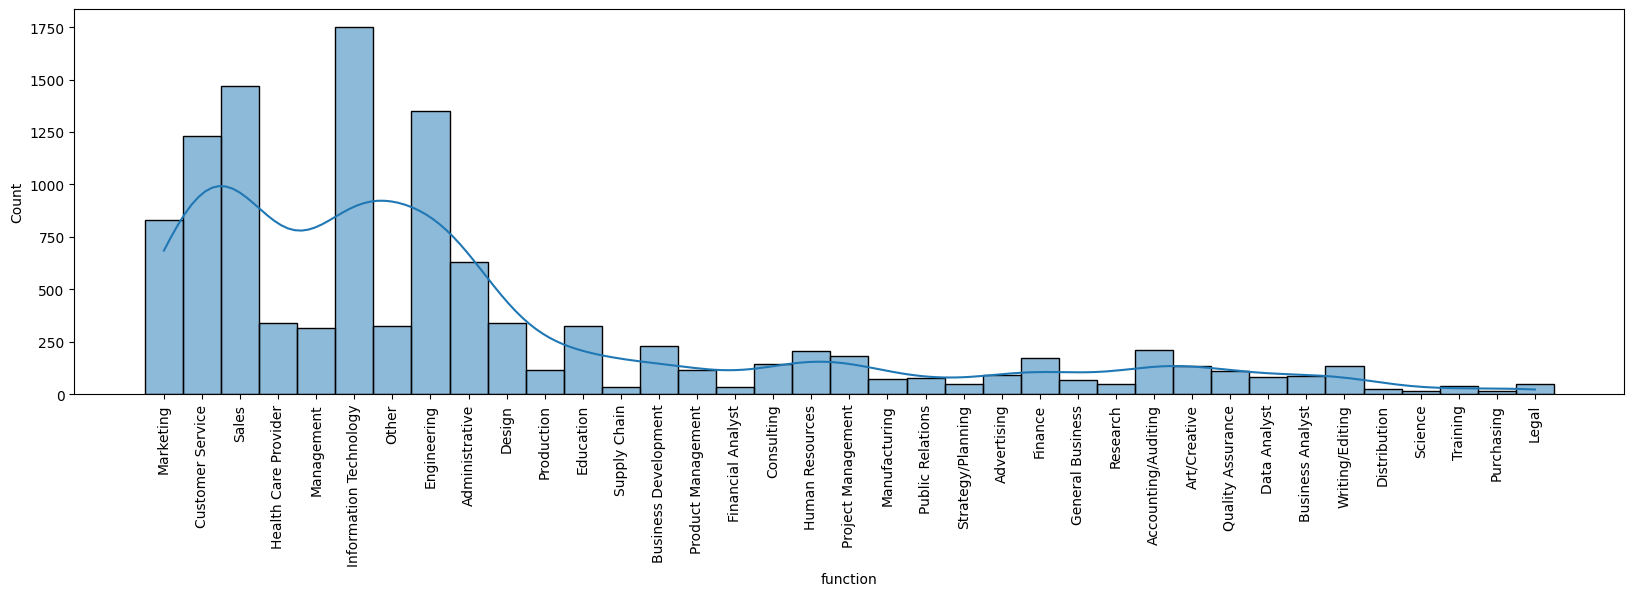

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(df['function'],kde=True)
plt.xticks(rotation=90)
plt.show()

Highest number of functions are offered in IT and Sales takes the second position.

In [ ]:
def missing_data(df):
  absolute_missing = df.isnull().sum().sort_values(ascending = False)
  percentage_missing = np.round((df.isnull().sum() / df.shape[0] * 100), 2).sort_values(ascending = False)
  missing_dataframe = pd.concat([absolute_missing, percentage_missing], axis = 1, keys = ['Total Count', 'Percentage'])
  return missing_dataframe[missing_dataframe['Total Count'] > 0]

In [ ]:
missing_data(df)

,Total Count,Percentage
department,11547,64.58
required_education,8105,45.33
benefits,7210,40.32
required_experience,7050,39.43
function,6455,36.10
industry,4903,27.42
employment_type,3471,19.41
company_profile,3308,18.50
requirements,2695,15.07
location,346,1.94


Let's visualize this null values

<Axes: >

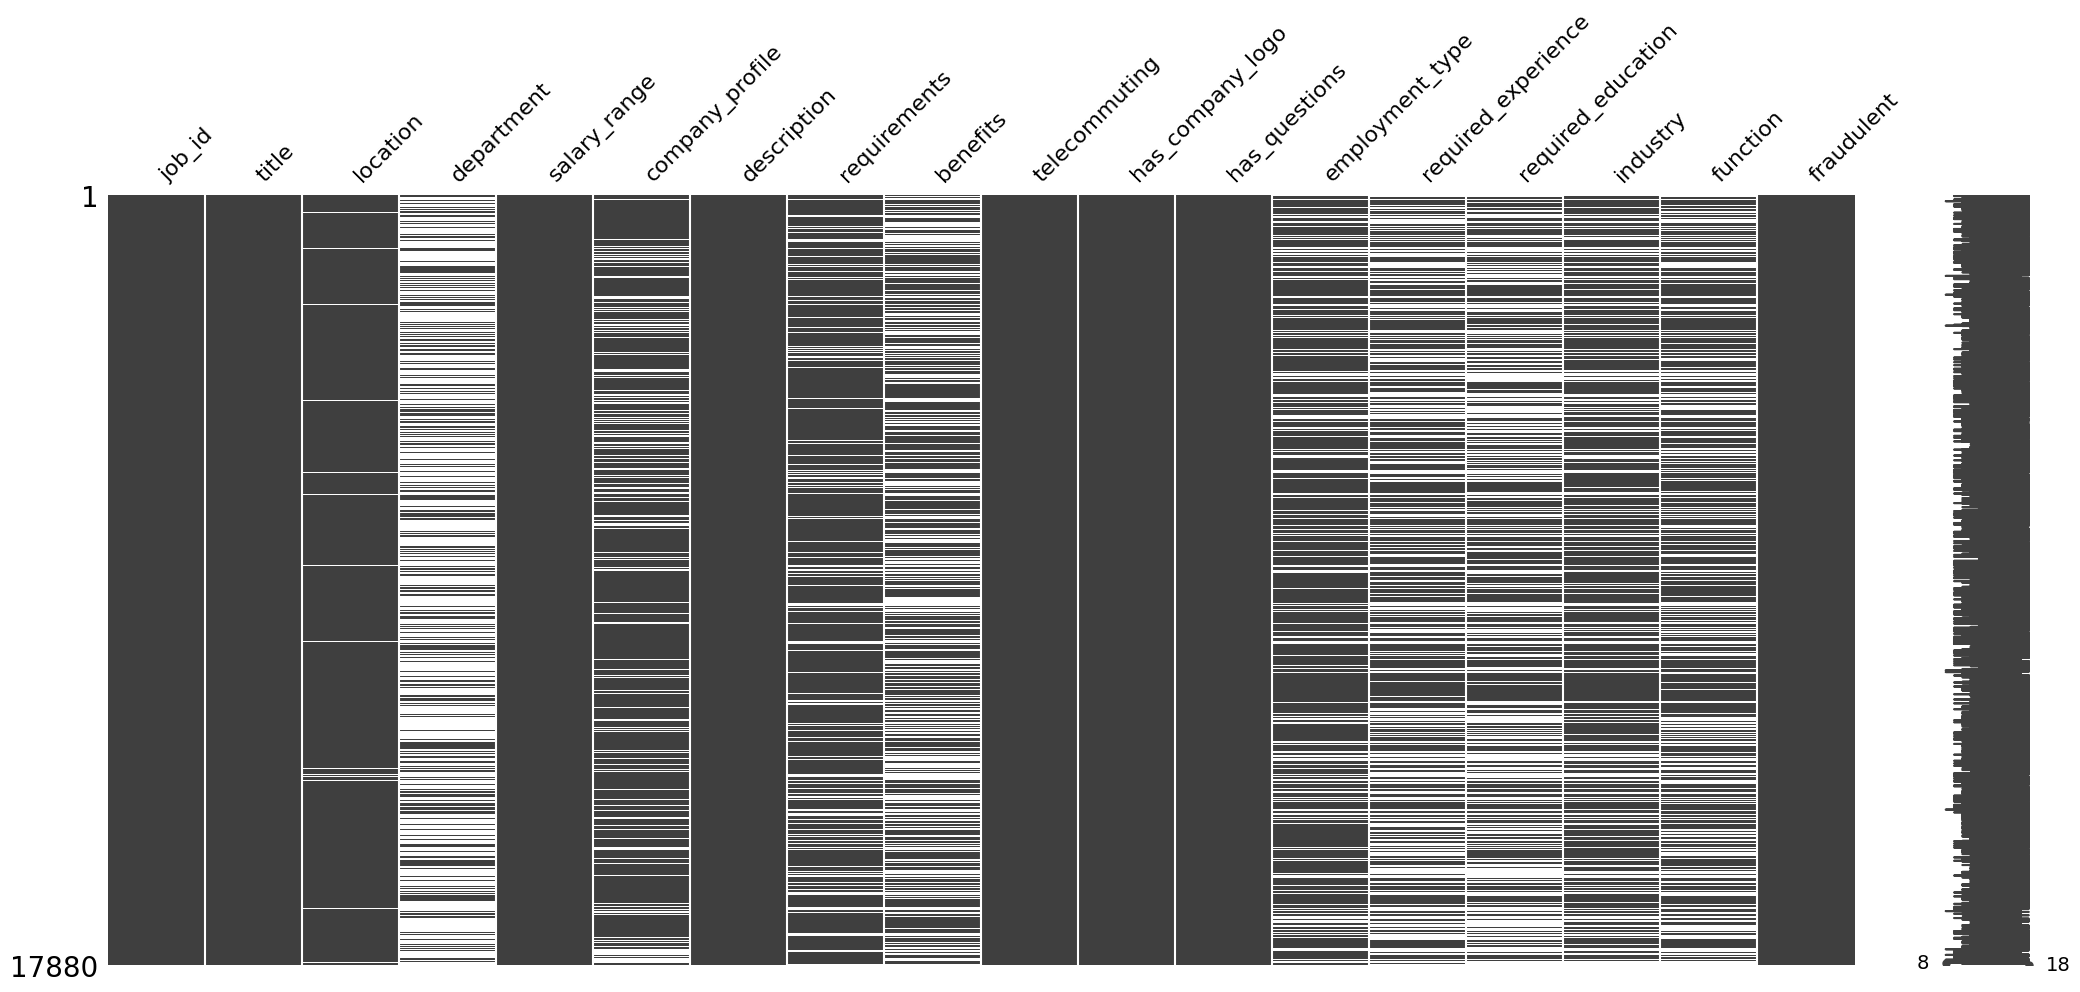

In [ ]:
missingno.matrix(df)


1.   Salary_range has the highest percentage of Null values.
2.  Description has the least percentage of Null values.The number of null values is 1. So we can simply drop that row to tackle the situation.





In [ ]:
df['department'].nunique()

1337

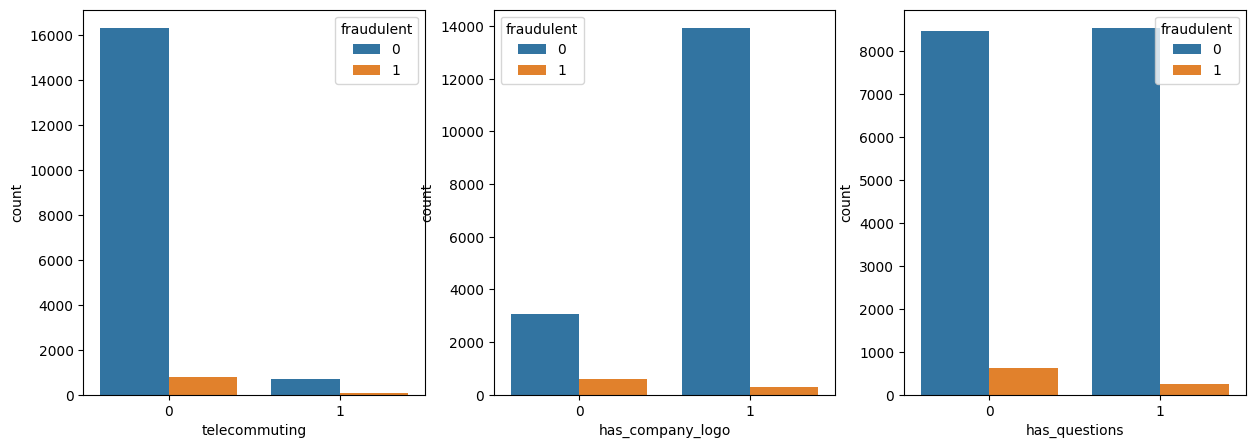

In [ ]:
variables = ['telecommuting',	'has_company_logo',	'has_questions']
fig, axs = plt.subplots(1, 3, figsize = (15,5))
for i, ax in zip(variables, axs.ravel()):
  sns.countplot(data =df, x = i, hue = 'fraudulent', ax = ax)


## Bi-Variate Analysis

Let's explore how the features affect in whether the posting is fake or not

<Axes: xlabel='employment_type', ylabel='count'>

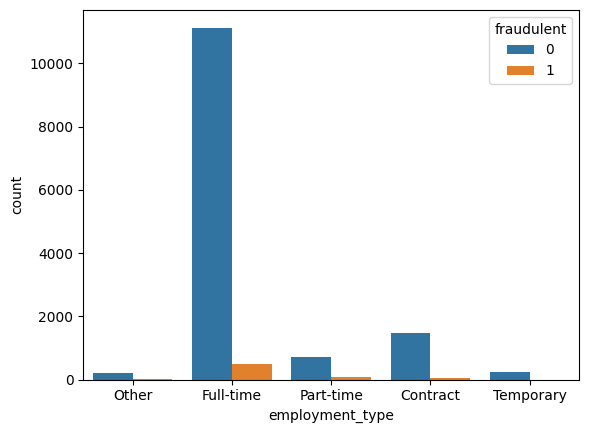

In [ ]:
sns.countplot(x=df['employment_type'],hue=df['fraudulent'])

In [ ]:
df['employment_type'].fillna('Not Known',inplace=True)

<Axes: xlabel='employment_type', ylabel='count'>

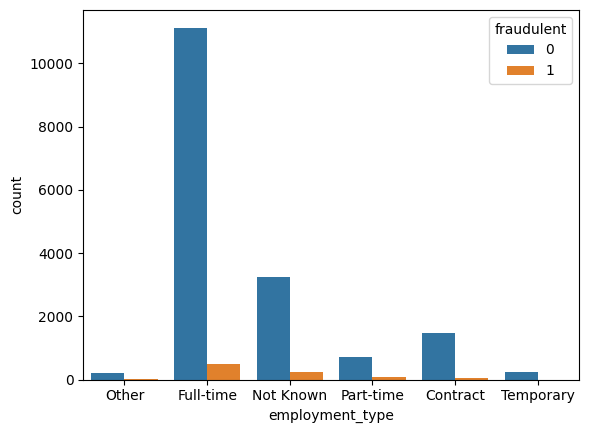

In [ ]:
sns.countplot(x=df['employment_type'],hue=df['fraudulent'])

Full time role has  the highest  number of fraud and non fraud postings.

<Axes: xlabel='required_experience', ylabel='count'>

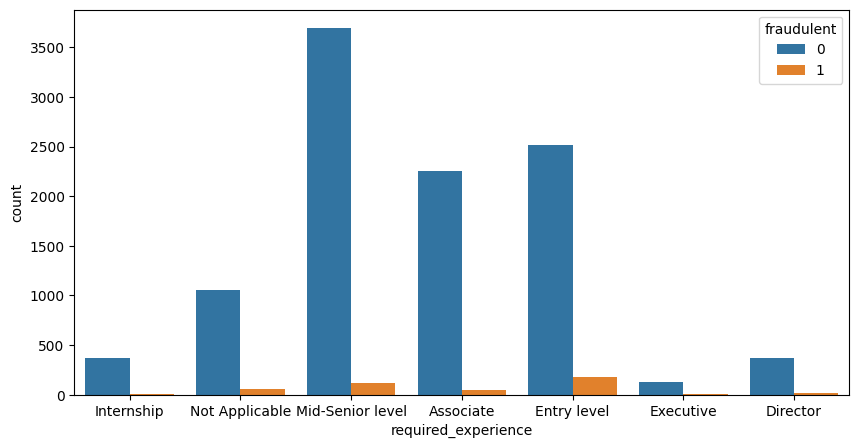

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['required_experience'],hue=df['fraudulent'])

In [ ]:
#Null value Treatment
df['required_experience'].fillna("Not Known",inplace=True)


<Axes: xlabel='required_experience', ylabel='count'>

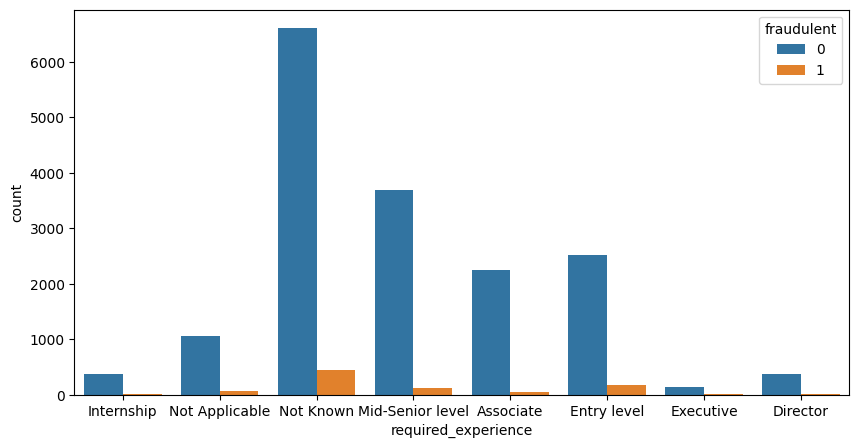

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['required_experience'],hue=df['fraudulent'])



1.  Not known and Mid-Senior level  postings have highest non fraudulent ones
2.  Entry level jobs postings have highest fraudulent postings



In [ ]:
df['required_education'].fillna("Not Known",inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Not Known'),
  Text(1, 0, "Bachelor's Degree"),
  Text(2, 0, "Master's Degree"),
  Text(3, 0, 'High School or equivalent'),
  Text(4, 0, 'Unspecified'),
  Text(5, 0, 'Some College Coursework Completed'),
  Text(6, 0, 'Vocational'),
  Text(7, 0, 'Certification'),
  Text(8, 0, 'Associate Degree'),
  Text(9, 0, 'Professional'),
  Text(10, 0, 'Doctorate'),
  Text(11, 0, 'Some High School Coursework'),
  Text(12, 0, 'Vocational - Degree'),
  Text(13, 0, 'Vocational - HS Diploma')])

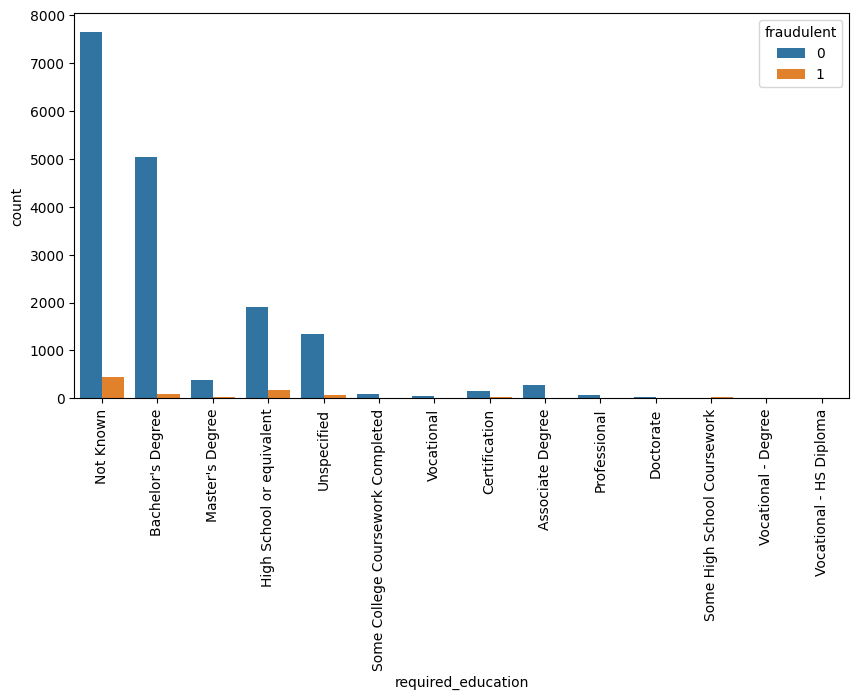

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['required_education'],hue=df['fraudulent'])
plt.xticks(rotation=90)

In [ ]:
df['required_education'].fillna("Not Known",inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Not Known'),
  Text(1, 0, "Bachelor's Degree"),
  Text(2, 0, "Master's Degree"),
  Text(3, 0, 'High School or equivalent'),
  Text(4, 0, 'Unspecified'),
  Text(5, 0, 'Some College Coursework Completed'),
  Text(6, 0, 'Vocational'),
  Text(7, 0, 'Certification'),
  Text(8, 0, 'Associate Degree'),
  Text(9, 0, 'Professional'),
  Text(10, 0, 'Doctorate'),
  Text(11, 0, 'Some High School Coursework'),
  Text(12, 0, 'Vocational - Degree'),
  Text(13, 0, 'Vocational - HS Diploma')])

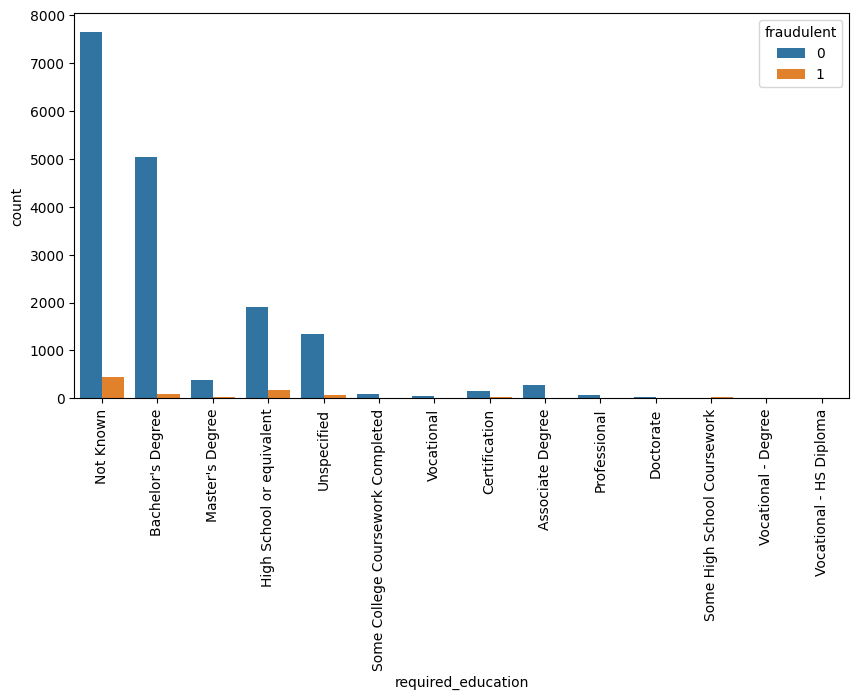

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['required_education'],hue=df['fraudulent'])
plt.xticks(rotation=90)



1.   Highest number of non fraudulent postings have required education as 'Not Known'.Although it is not a suitable assumption as we do not know much about the ideal distribution of not known . So it would be better to assume  highest number of non fraudulent postings have required education as 'Bachelor's degree'.
2.    Highest number of fraudulent postings have required education as 'High School or equivalent'.



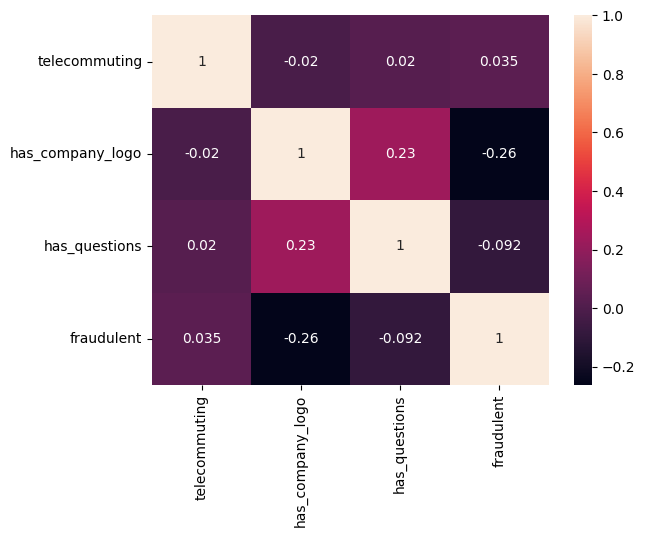

In [ ]:
sns.heatmap(df[["telecommuting","has_company_logo","has_questions","fraudulent"]].corr(),annot=True);

'has_company_logo' is strongly related to the job being fraudulent or not

## **Feature Importance**

## **Hypothesis Testing**

In [ ]:
## Let us start with has_company_logo and Fraudulent
## Let us define null and alternative Hypothesis

##Ho : Fraudulent posts are not related or dependent on has_company_logo
##Ha : Fraudulent posts are related or dependent on has_company_logo
## alpha: 5%
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
logo_crosstab =pd.crosstab(df['has_company_logo'] , df['fraudulent'])
print(logo_crosstab)
chi2_contingency(logo_crosstab)

fraudulent            0    1
has_company_logo            
0                  3077  583
1                 13937  283


Chi2ContingencyResult(statistic=1224.063728051359, pvalue=3.5943691337772625e-268, dof=1, expected_freq=array([[ 3482.73154362,   177.26845638],
       [13531.26845638,   688.73154362]]))

So we can affirm that 'fraudulent' is dependent on 'has_company_logo'

**Let us define the null and alternative hypothesis for chi-square testing between 'has_questions' and 'fraudulent'**

*   Ho: Fraudulent posts are not related or dependent on has_questions
*   Ha: Fraudulent posts are related or dependent on has_questions
*   alpha: 5%

In [ ]:
q_crosstab =pd.crosstab(df['has_questions'] , df['fraudulent'])
print(q_crosstab)
chi2_contingency(q_crosstab)

fraudulent        0    1
has_questions           
0              8472  616
1              8542  250


Chi2ContingencyResult(statistic=149.26000303433847, pvalue=2.515984961488263e-34, dof=1, expected_freq=array([[8647.83176734,  440.16823266],
       [8366.16823266,  425.83176734]]))

We can reject the nulll hypothesis and we can say that they are dependent.

**Let us define the null and alternative hypothesis for chi-square testing between 'required_experience' and 'fraudulent'**

*   Ho: Fraudulent posts are not related or dependent on required_experience
*   Ha: Fraudulent posts are related or dependent on required_experience
*   alpha: 5%

In [ ]:
exp_crosstab = pd.crosstab(df['required_experience'] , df['fraudulent'])
print(exp_crosstab)
chi2_contingency(exp_crosstab)

fraudulent              0    1
required_experience           
Associate            2255   42
Director              372   17
Entry level          2518  179
Executive             131   10
Internship            371   10
Mid-Senior level     3696  113
Not Applicable       1056   60
Not Known            6615  435


Chi2ContingencyResult(statistic=126.65990038555026, pvalue=3.1318911349512988e-24, dof=7, expected_freq=array([[2185.74709172,  111.25290828],
       [ 370.15917226,   18.84082774],
       [2566.37348993,  130.62651007],
       [ 134.17080537,    6.82919463],
       [ 362.5466443 ,   18.4533557 ],
       [3624.51487696,  184.48512304],
       [1061.94765101,   54.05234899],
       [6708.54026846,  341.45973154]]))

So we can reject the null hypothesis and say that fraudulent is dependent on 'required_education'.

**Let us define the null and alternative hypothesis for chi-square testing between 'required_education' and 'fraudulent'**

*   Ho: Fraudulent posts are not related or dependent on required_education
*   Ha: Fraudulent posts are related or dependent on required_education
*   alpha: 5%

In [ ]:
edu_crosstab = pd.crosstab(df['required_education'] , df['fraudulent'])
print(edu_crosstab)
chi2_contingency(edu_crosstab)

fraudulent                            0    1
required_education                          
Associate Degree                    268    6
Bachelor's Degree                  5045  100
Certification                       151   19
Doctorate                            25    1
High School or equivalent          1910  170
Master's Degree                     385   31
Not Known                          7654  451
Professional                         70    4
Some College Coursework Completed    99    3
Some High School Coursework           7   20
Unspecified                        1336   61
Vocational                           49    0
Vocational - Degree                   6    0
Vocational - HS Diploma               9    0


Chi2ContingencyResult(statistic=463.8082706781638, pvalue=7.009207304287559e-91, dof=13, expected_freq=array([[2.60729083e+02, 1.32709172e+01],
       [4.89580705e+03, 2.49192953e+02],
       [1.61766219e+02, 8.23378076e+00],
       [2.47407159e+01, 1.25928412e+00],
       [1.97925727e+03, 1.00742729e+02],
       [3.95851454e+02, 2.01485459e+01],
       [7.71244239e+03, 3.92557606e+02],
       [7.04158837e+01, 3.58411633e+00],
       [9.70597315e+01, 4.94026846e+00],
       [2.56922819e+01, 1.30771812e+00],
       [1.32933770e+03, 6.76623043e+01],
       [4.66267338e+01, 2.37326622e+00],
       [5.70939597e+00, 2.90604027e-01],
       [8.56409396e+00, 4.35906040e-01]]))

Looking at the p-value we can affirm that 'fraudulent' is dependent on 'required_education'.

**Let us define the null and alternative hypothesis for chi-square testing between 'employment_type' and 'fraudulent'**

*   Ho: Fraudulent posts are not related or dependent on employment_type
*   Ha: Fraudulent posts are related or dependent on employment_type
*   alpha: 5%

In [ ]:
emp_crosstab = pd.crosstab(df['employment_type'] , df['fraudulent'])
print(emp_crosstab)
chi2_contingency(emp_crosstab)

fraudulent           0    1
employment_type            
Contract          1480   44
Full-time        11130  490
Not Known         3230  241
Other              212   15
Part-time          723   74
Temporary          239    2


Chi2ContingencyResult(statistic=99.82857127990998, pvalue=5.743635664197717e-20, dof=5, expected_freq=array([[1.45018658e+03, 7.38134228e+01],
       [1.10571969e+04, 5.62803132e+02],
       [3.30288557e+03, 1.68114430e+02],
       [2.16005481e+02, 1.09945190e+01],
       [7.58398098e+02, 3.86019016e+01],
       [2.29327405e+02, 1.16725951e+01]]))

The p-value indicates that we can simply reject the null hypothesis and say that 'fraudulent' is dependent on 'employment_type'.

**Let us define the null and alternative hypothesis for chi-square testing between 'telecommuting' and 'fraudulent'**

*   Ho: Fraudulent posts are not related or dependent on telecommuting
*   Ha: Fraudulent posts are related or dependent on telecommuting
*   alpha: 5%

In [ ]:
tele_crosstab = pd.crosstab(df['telecommuting'] , df['fraudulent'])
print(tele_crosstab)
chi2_contingency(tele_crosstab)

fraudulent         0    1
telecommuting            
0              16311  802
1                703   64


Chi2ContingencyResult(statistic=20.52366035210324, pvalue=5.88986891319539e-06, dof=1, expected_freq=array([[16284.14888143,   828.85111857],
       [  729.85111857,    37.14888143]]))

Looking at the p-value we can affirm that 'telecommuting' has effect on 'fraudulent'.

## **Feature Extraction:**

Let's Extract city names and country names from feature location

In [ ]:
df['location'].value_counts()

GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
                        ... 
GB, SFK, Leiston           1
GB, LND, Hammersmith       1
US, WA, Seattle            1
BE                         1
GB, WSX, Chichester        1
Name: location, Length: 3105, dtype: int64

In [ ]:
df['location'].fillna("Not Known",inplace=True)

In [ ]:
df['location'].value_counts()

GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
Not Known                346
                        ... 
GB, SFK, Leiston           1
GB, LND, Hammersmith       1
US, WA, Seattle            1
BE                         1
GB, WSX, Chichester        1
Name: location, Length: 3106, dtype: int64

In [ ]:
df['location']=df['location'].apply(lambda x: x.split(",")[0])

In [ ]:
df['location'].value_counts()

US    10656
GB     2384
GR      940
CA      457
DE      383
      ...  
SI        1
CO        1
SD        1
UG        1
KH        1
Name: location, Length: 91, dtype: int64

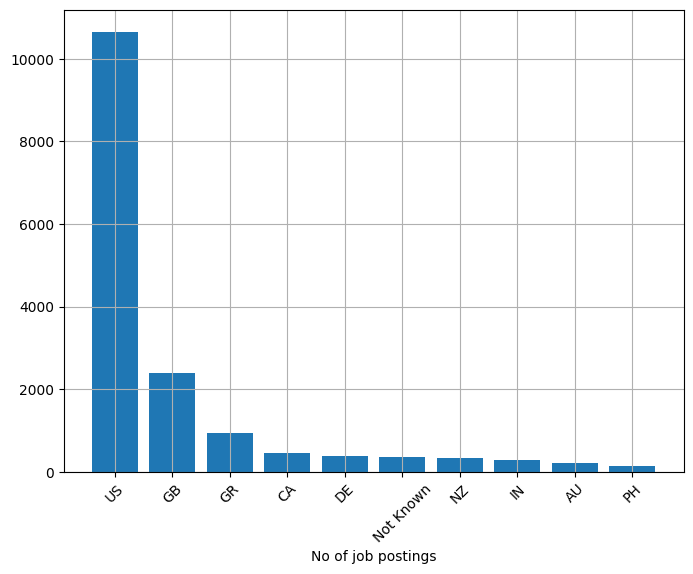

In [ ]:
country =dict(df['location'].value_counts()[:10])
plt.figure(figsize=(8,6))
plt.bar(country.keys(),country.values())
plt.xlabel('country')
plt.xlabel('No of job postings')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Now Let us look at the situation with null values again

In [ ]:
missing_data(df)

,Total Count,Percentage
department,11547,64.58
benefits,7210,40.32
function,6455,36.10
industry,4903,27.42
company_profile,3308,18.50
requirements,2695,15.07
description,1,0.01


#  text data analysis

In [ ]:
text_columns =['title','department','company_profile','description','requirements','benefits','industry','function','location']

Let us fill the null values in these columns before we proceed with any kind of processing

In [ ]:
for i in text_columns:
  df[i].fillna("",inplace=True)

In [ ]:
missing_data(df)

,Total Count,Percentage


There are no more missing values

<Axes: >

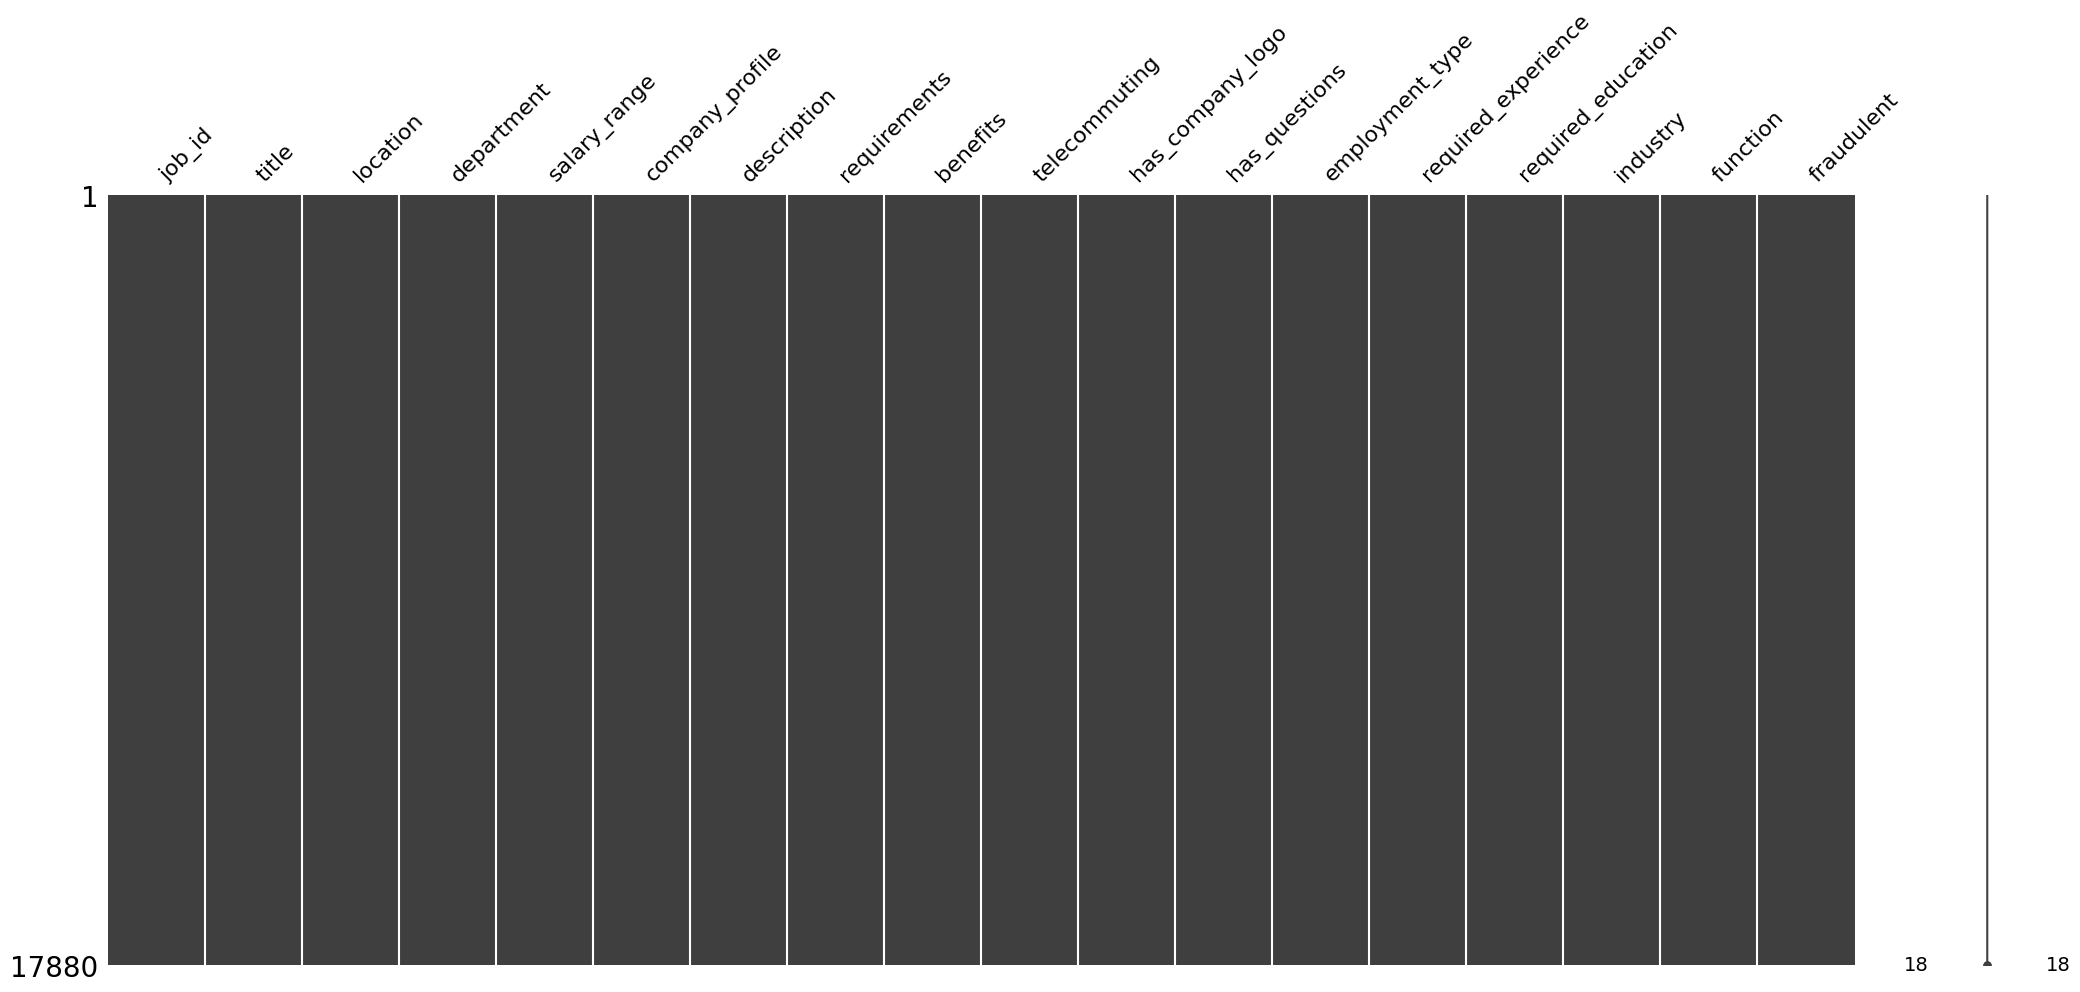

In [ ]:
missingno.matrix(df)

Let us take a look at the text fields that we are going to concatenate

In [ ]:
df['title']

0                                         Marketing Intern
1                Customer Service - Cloud Video Production
2                  Commissioning Machinery Assistant (CMA)
3                        Account Executive - Washington DC
4                                      Bill Review Manager
                               ...                        
17875                     Account Director - Distribution 
17876                                   Payroll Accountant
17877    Project Cost Control Staff Engineer - Cost Con...
17878                                     Graphic Designer
17879                           Web Application Developers
Name: title, Length: 17880, dtype: object

In [ ]:
df['company_profile'][:5]

0    We're Food52, and we've created a groundbreaki...
1    90 Seconds, the worlds Cloud Video Production ...
2    Valor Services provides Workforce Solutions th...
3    Our passion for improving quality of life thro...
4    SpotSource Solutions LLC is a Global Human Cap...
Name: company_profile, dtype: object

In [ ]:
df['description'][:5]

0    Food52, a fast-growing, James Beard Award-winn...
1    Organised - Focused - Vibrant - Awesome!Do you...
2    Our client, located in Houston, is actively se...
3    THE COMPANY: ESRI – Environmental Systems Rese...
4    JOB TITLE: Itemization Review ManagerLOCATION:...
Name: description, dtype: object

In [ ]:
df['requirements'][:5]

0    Experience with content management systems a m...
1    What we expect from you:Your key responsibilit...
2    Implement pre-commissioning and commissioning ...
3    EDUCATION: Bachelor’s or Master’s in GIS, busi...
4    QUALIFICATIONS:RN license in the State of Texa...
Name: requirements, dtype: object

In [ ]:
df['benefits'][:5]

0                                                     
1    What you will get from usThrough being part of...
2                                                     
3    Our culture is anything but corporate—we have ...
4                                Full Benefits Offered
Name: benefits, dtype: object

In [ ]:
df['function'][:5]

0               Marketing
1        Customer Service
2                        
3                   Sales
4    Health Care Provider
Name: function, dtype: object

In [ ]:
df['department'][:5]

0    Marketing
1      Success
2             
3        Sales
4             
Name: department, dtype: object

In [ ]:
df['industry'][:5]

0                             
1    Marketing and Advertising
2                             
3            Computer Software
4       Hospital & Health Care
Name: industry, dtype: object

In [ ]:
##Initializing a new column to concat the text fields
df['combined_text']=""


In [ ]:
for i in text_columns:
  df['combined_text']=df['combined_text']+" "+df[i]

Let us take a look at the concatenated data

In [ ]:
df['combined_text'].iloc[0]

" Marketing Intern Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food community and crowd-sou

<Axes: >

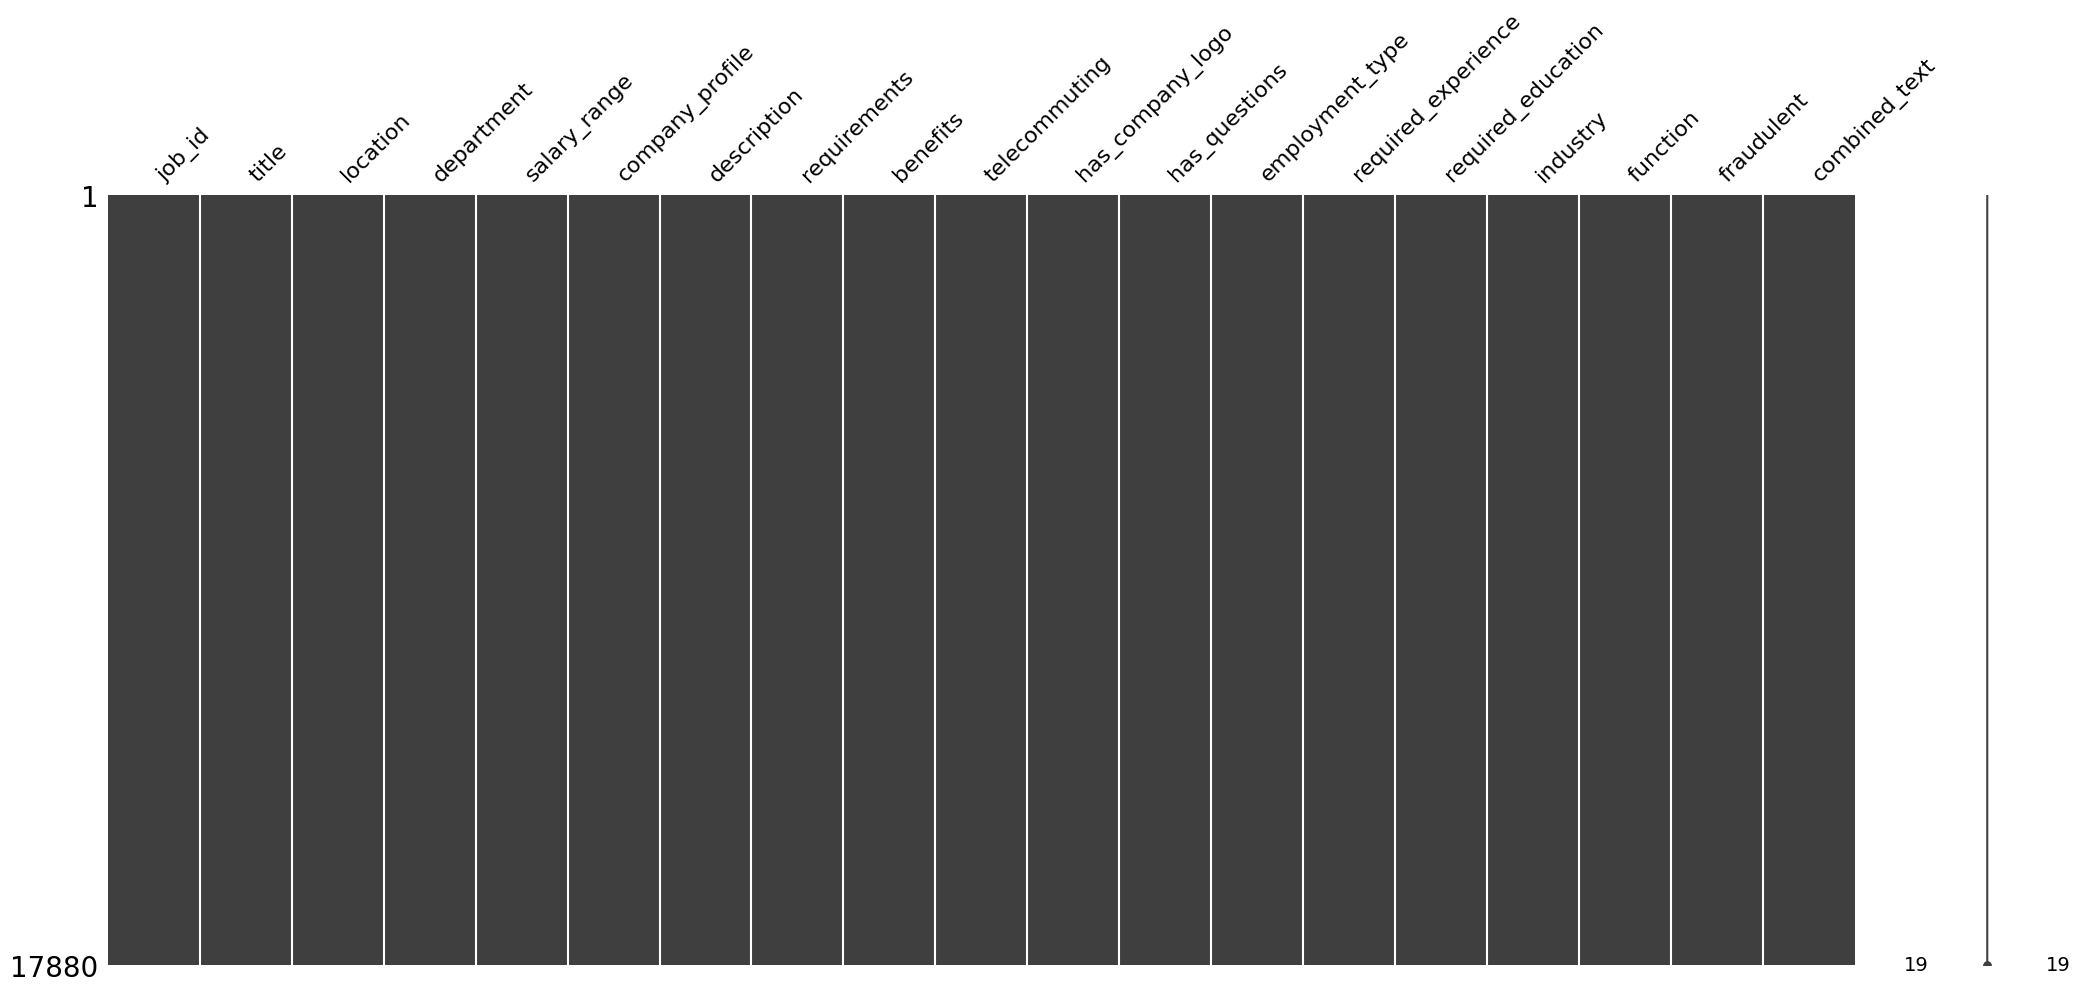

In [ ]:
missingno.matrix(df)

Let us write a function to clean the text

In [ ]:
##Starting with importing and initializing stopwords and removing the word not from there as it could hold significance in determining the semantics
import nltk

##Downloading stopwords
nltk.download('stopwords')

## Getting the set for stopwords in english
stop_eng=set(stopwords.words("english"))

## Removing 'not' from the set
stop_eng.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
## Looking into the stopwords
stop_eng

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's'

In [ ]:
## We will use regex to write a function to clean the text

def clean_text(text):

  ##Let us start with lowercasing the text
  text = text.lower()

  ## Let us go on and remove punctuations next
  text = re.sub(r'[^a-zA-Z0-9\s]',"", text)



  ## Let us remove the HTML tags next
  text=re.sub(r"<.*?>","", text)


 ## Let us remove underscores now
  text = re.sub(r"_+","", text)


  ## Let us remove multiple spaces
  text = re.sub(r"\s{2,}","", text)


  ## Let us remove digits after this
  text = re.sub(r"\d{1,}","", text)


  ## Let us remove single characters
  text = re.sub(r"\s\w\s","", text)


  return text;




In [ ]:
## Defining a function that correctly identifies a URL is correct or not

def Correct_URL(Text):

  ## Correct URL using regex
  url_pattern = r'\b(?:https?://|www\.)\S+\b'

  ## Replacing correct URL with word 'CorrectURL'
  corrected_text = re.sub(url_pattern, 'CorrectURL', Text)

  ## Replacing wrong URL with 'FraudURL'
  wrong_url_pattern = r'CorrectURL'
  final_text = re.sub(wrong_url_pattern, 'FraudURL', corrected_text)

  return final_text

Let's apply the functions on text data

In [ ]:
df['combined_text']=df['combined_text'].apply(clean_text)
df['combined_text']=df['combined_text'].apply(Correct_URL)

Let's see how it looks

In [ ]:
df['combined_text'].iloc[0]

' marketing intern marketing were food and weve createdgroundbreaking and awardwinning cooking site we support connect and celebrate home cooks and give them everything they need in one placewe havetop editorial business and engineering team were focused on using technology to find new and better ways to connect people around their specific food interests and to offer them superb highly curated information about food and cooking we attract the most talented home cooks and contributors in the country we also publish wellknown professionals like mario batali gwyneth paltrow and danny meyer and we have partnerships with whole foods market and random housefood has been named the best food website by the james beard foundation and iacp and has been featured in the new york times npr pando daily techcrunch and on the today showwere located in chelsea in new york city foodfastgrowing james beard awardwinning online food community and crowdsourced and curated recipe hub is currently interviewi

**Lemmatization**

Here in the code we will use pos_tagging.In normal lemmatization some Verbs are treated as Nouns.pos_tagging takes care of this issues and helps creating a better model from the perspective of semantic meaning.

In [ ]:
## We will now define a function that will implement Lemmatization with POS .we are doing it to get better results with semantic meaning
## Writing function for customising pos_tagging
def pos_tagger(tag):
  if tag.startswith('J'):
        return wordnet.ADJ
  elif tag.startswith('V'):
        return wordnet.VERB
  elif tag.startswith('N'):
        return wordnet.NOUN
  elif tag.startswith('R'):
        return wordnet.ADV
  else:
        return None

def lemma(text):
  ##Initialize  lemmatizer
  lemmatizer = WordNetLemmatizer()

  ## Let us tokenizing the texts
  tokenized_words = word_tokenize(text)



  ##Implementing Lemmatizer and stopwords removal
  lemma_words=[lemmatizer.lemmatize(token) for token in tokenized_words if token not in stop_eng]



  ##Joining back the words
  final_text = ' '.join(lemma_words)

  return final_text



In [ ]:
##Let us Apply the lemma function on 'combined_text'
df['combined_text']=df['combined_text'].apply(lemma)

In [ ]:
## Let us take a look at the changes
df['combined_text'].iloc[0]

'marketing intern marketing food weve createdgroundbreaking awardwinning cooking site support connect celebrate home cook give everything need one placewe havetop editorial business engineering team focused using technology find new better way connect people around specific food interest offer superb highly curated information food cooking attract talented home cook contributor country also publish wellknown professional like mario batali gwyneth paltrow danny meyer partnership whole food market random housefood named best food website james beard foundation iacp featured new york time npr pando daily techcrunch today showwere located chelsea new york city foodfastgrowing james beard awardwinning online food community crowdsourced curated recipe hub currently interviewing full parttime unpaid intern work insmall team editor executive developer new york city headquartersreproducing andor repackaging existing food content fornumber partner site huffington post yahoo buzzfeed various cont

Next we would do some analysis using text data to understand the difference between fraud and real job posting.

In [ ]:
## Let us create two variables one with real job post text data and other with fake one
real_job_postings = df[df['fraudulent']==0]['combined_text'].values
fake_job_postings = df[df['fraudulent']==1]['combined_text'].values

In [ ]:
## Let's get two variables with string lengths of real and fake job postings respectively
real_job_str_len = df[df['fraudulent']==0]['combined_text'].str.len()
Fraud_job_str_len = df[df['fraudulent']==1]['combined_text'].str.len()


**KS Test:**

In [ ]:
## Let us run a Ks Test here and see if they belong to the same distribution
## Null Hypothesis : Both real_job_str_len and Fraud_job_str_len belong to same distribution
## Alternative Hypothesis : real_job_str_len and Fraud_job_str_len doesn't belong to same distribution
## Alpha : 5%
stats.kstest(real_job_str_len,Fraud_job_str_len)

KstestResult(statistic=0.2774196823645573, pvalue=1.4742093246454715e-56, statistic_location=1522, statistic_sign=-1)

Clearly we should reject the null hypothesis . They don't belong to the same distribution

<Axes: xlabel='combined_text', ylabel='Count'>

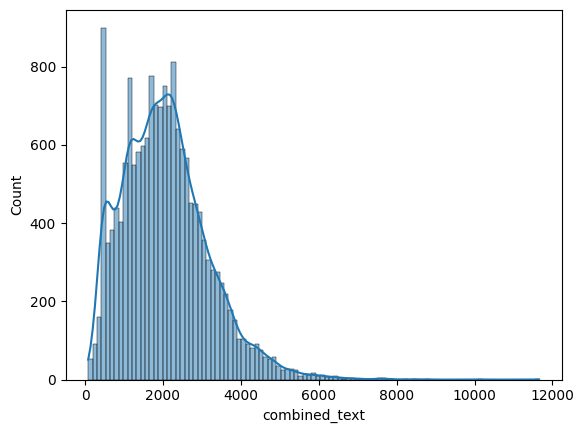

In [ ]:
## Let's visualize this
sns.histplot(real_job_str_len,kde=True)

<Axes: xlabel='combined_text', ylabel='Count'>

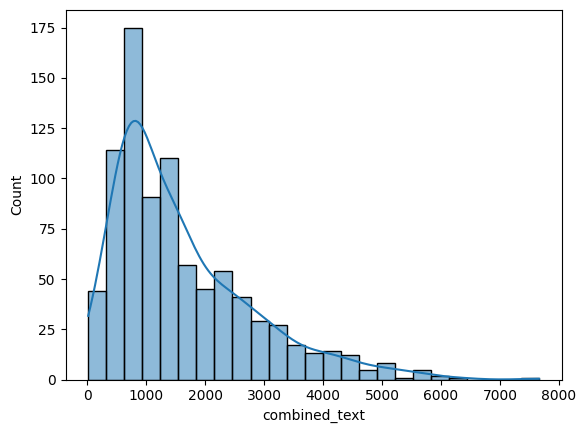

In [ ]:
sns.histplot(Fraud_job_str_len,kde=True)

It is pretty evident that the avg/median string length for fraudulent job postings are visibly less than that of real job postings

In [ ]:
real_job_postings.dtype

dtype('O')

**Wordcloud**

In [ ]:
## Let us write a function to generate wordclouds
def gen_wordcloud(text):
  wordcloud = WordCloud(width=800,height=500,background_color='black',stopwords=STOPWORDS).generate(text)
  plt.figure(figsize=(20,20))
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.show()


In [ ]:
## Defining the generate function
def generate(text,ngram_size):
  n_grams=ngrams(word_tokenize(text),ngram_size)
  final=[' '.join(val) for val in n_grams]

  return final

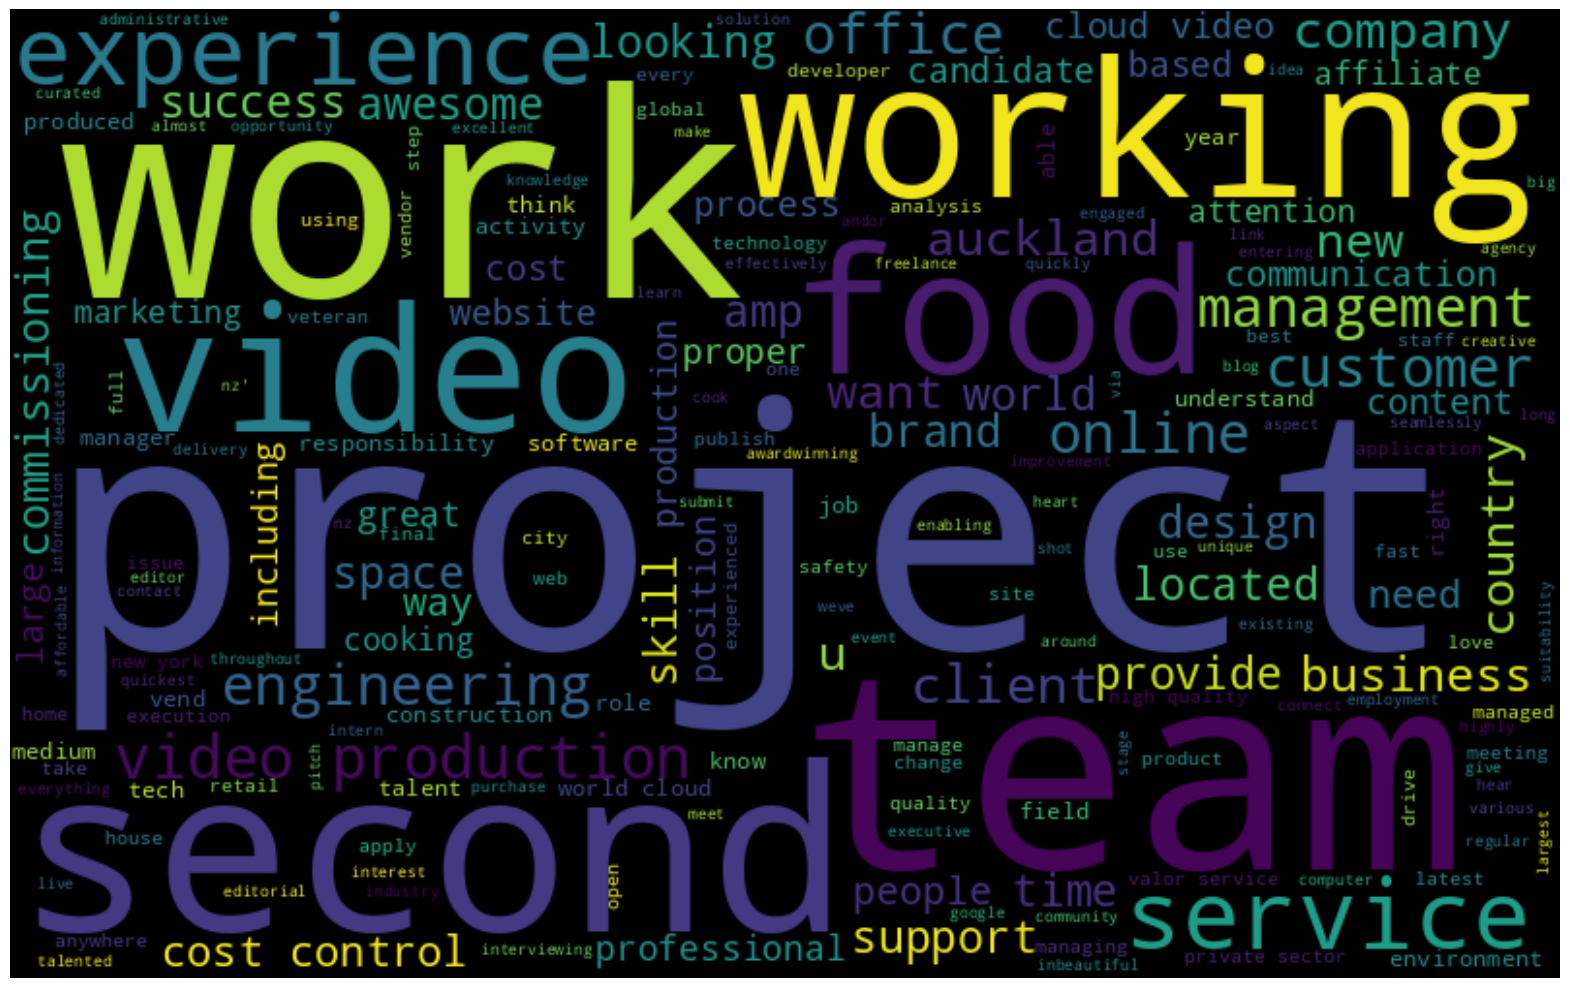

In [ ]:
## Wordcloud for real_job_postings
gen_wordcloud(str(real_job_postings))

In [ ]:
from collections import defaultdict
## Let us get the top 10 words

##Let us define a dictionary to store the words and counts
realdict_1 = defaultdict(int)

##Generate a dataframe when we are tokenizing with ngrams=1
for text in df[df['fraudulent']==0]['combined_text'].values:
  for words in generate(text,1):
    realdict_1[words]+=1
real_postings_1 =pd.DataFrame(sorted(realdict_1.items() , key =lambda x:x[1],reverse=True))

Top 10 words when we use ngrams=1

<Axes: xlabel='0', ylabel='1'>

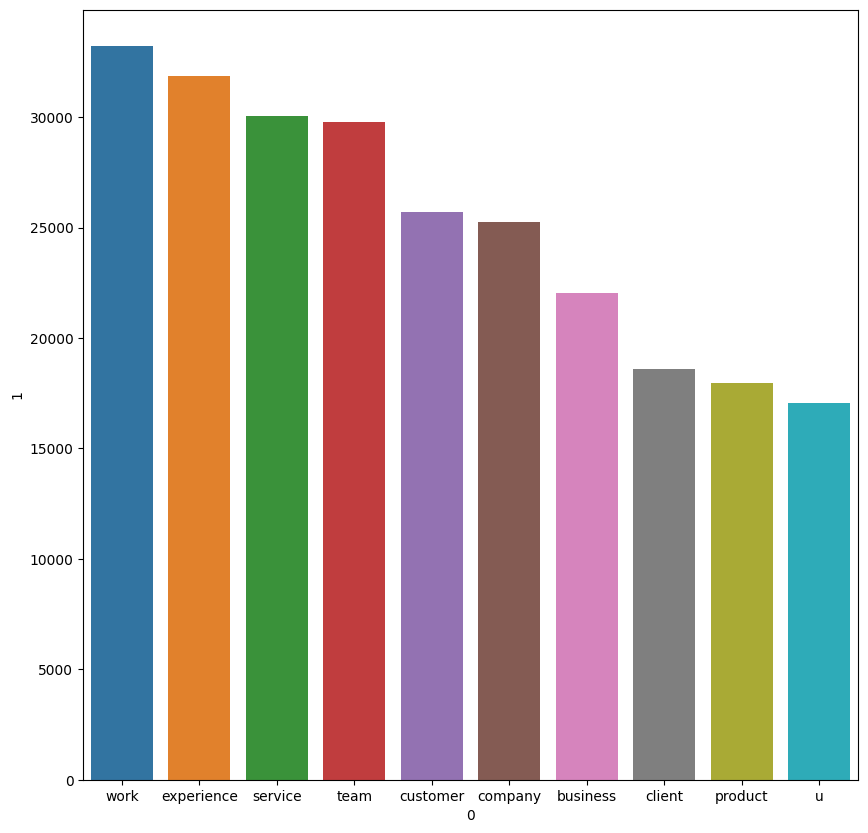

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=real_postings_1[0][:10],y=real_postings_1[1][:10])

Let us do the same for real job postings for ngrams=2

In [ ]:
realdict_2 = defaultdict(int)

##Generate a dataframe when we are tokenizing with ngrams=1
for text in df[df['fraudulent']==0]['combined_text'].values:
  for words in generate(text,2):
    realdict_2[words]+=1
real_postings_2 =pd.DataFrame(sorted(realdict_2.items() , key =lambda x:x[1],reverse=True))

<Axes: xlabel='0', ylabel='1'>

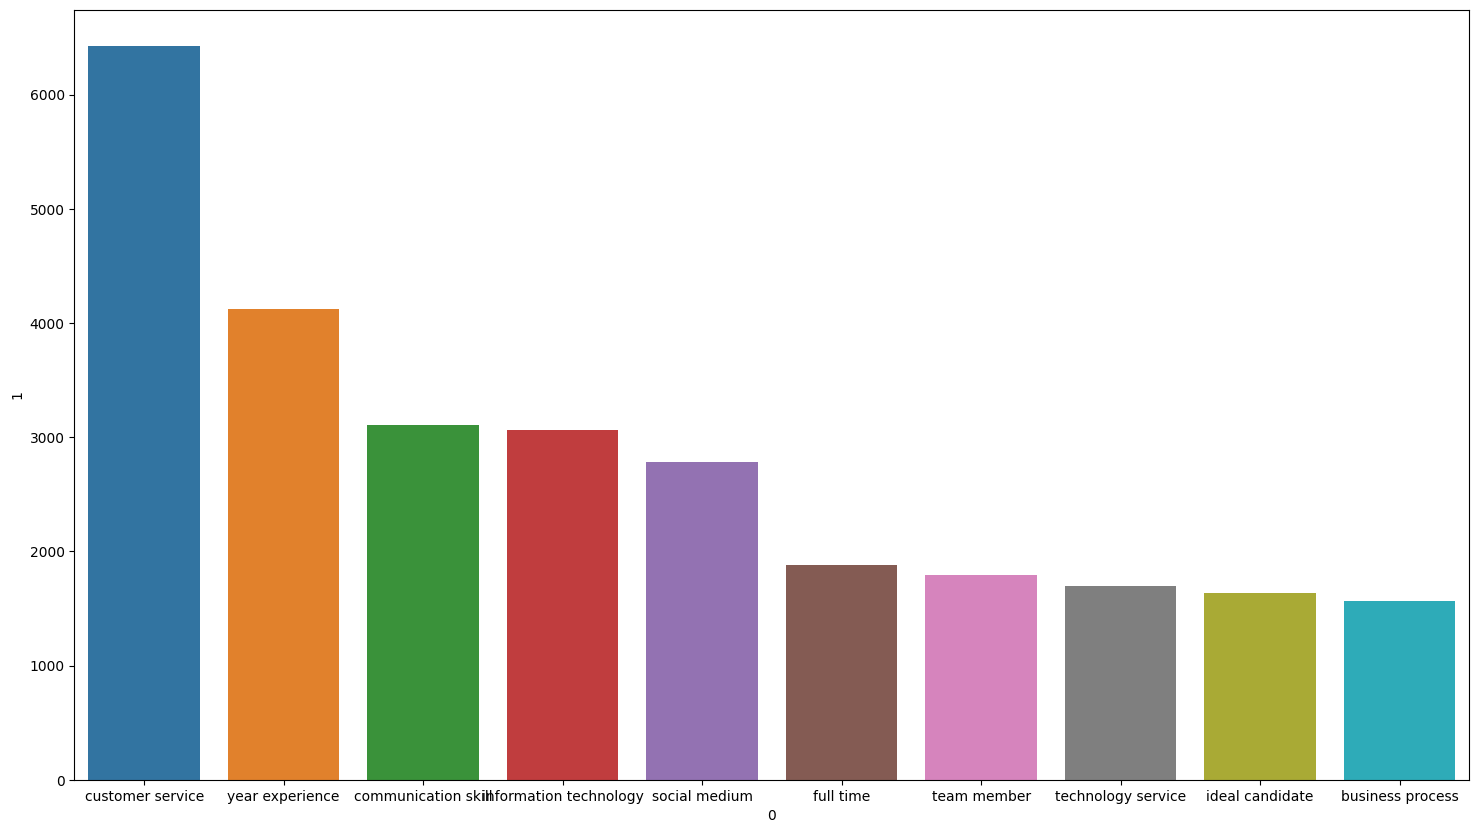

In [ ]:
plt.figure(figsize=(18,10))
sns.barplot(x=real_postings_2[0][:10],y=real_postings_2[1][:10])

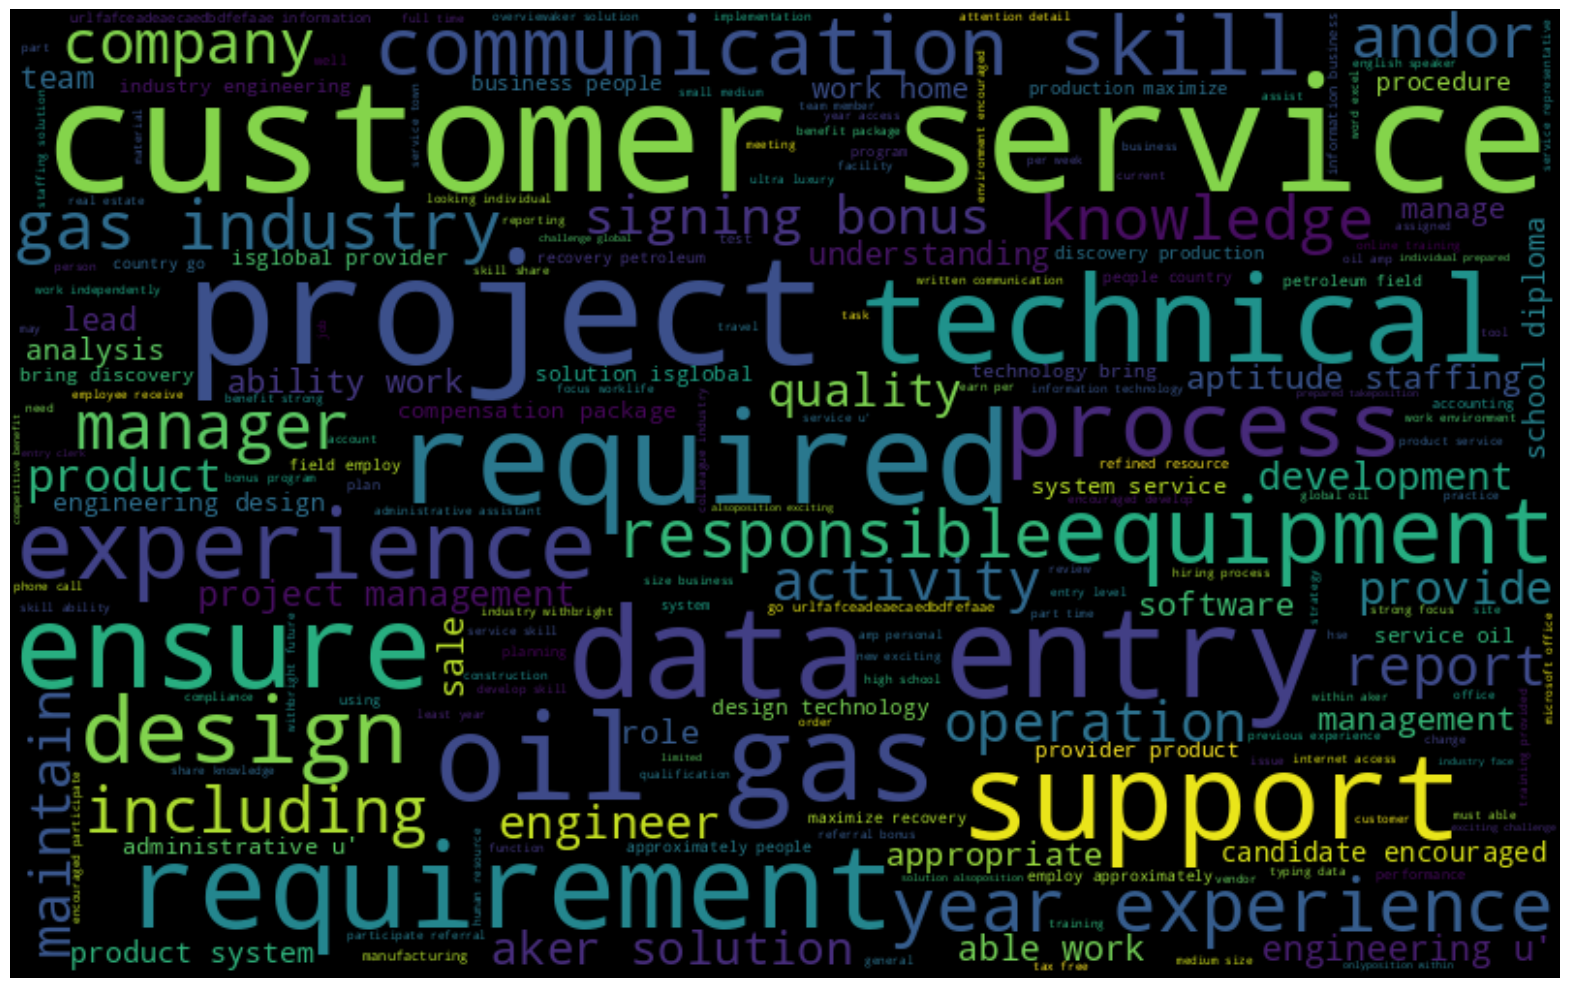

In [ ]:
## Wordcloud for fake job postings
gen_wordcloud(str(fake_job_postings))

Let us get the top 10 words for fake job postings for ngrams=1 and 2 respectively

In [ ]:
##Let us define a dictionary to store the words and counts
fakedict_1 = defaultdict(int)

##Generate a dataframe when we are tokenizing with ngrams=1
for text in df[df['fraudulent']==1]['combined_text'].values:
  for words in generate(text,1):
    fakedict_1[words]+=1
fake_postings_1 =pd.DataFrame(sorted(fakedict_1.items() , key =lambda x:x[1],reverse=True))

In [ ]:
fake_postings_1

,0,1
0,work,1492
1,service,1357
2,experience,1293
3,customer,1066
4,skill,986
...,...,...
15850,asmovermust,1
15851,skillsstart,1
15852,liftflexibile,1
15853,schedulegeat,1


<Axes: xlabel='0', ylabel='1'>

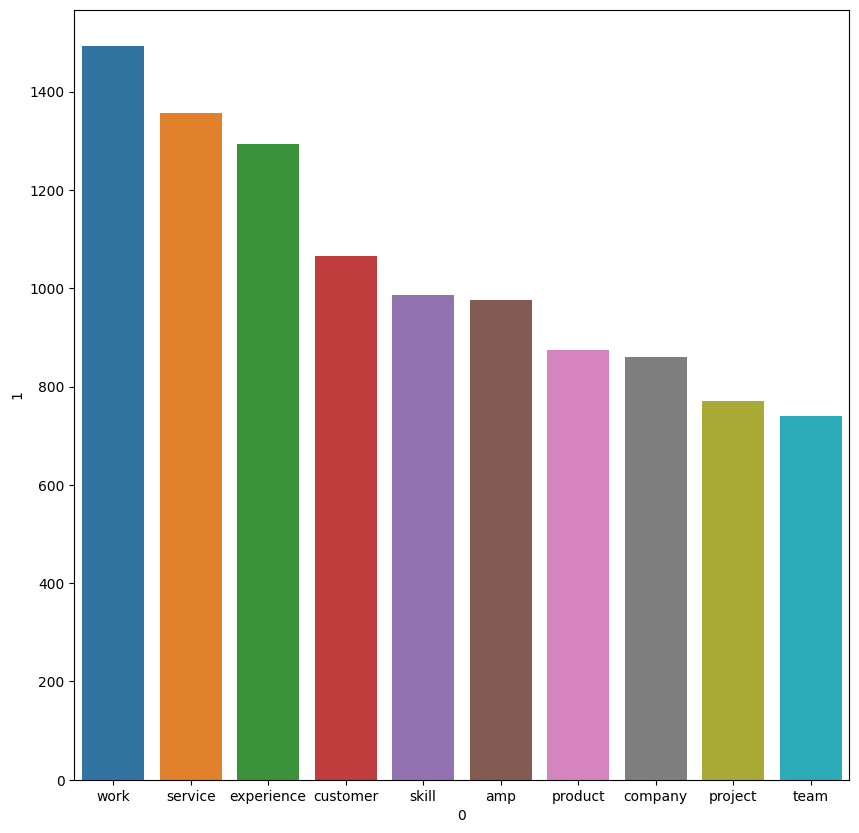

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x=fake_postings_1[0][:10],y=fake_postings_1[1][:10])

In [ ]:
##Let us define a dictionary to store the words and counts
fakedict_2 = defaultdict(int)

##Generate a dataframe when we are tokenizing with ngrams=2
for text in df[df['fraudulent']==1]['combined_text'].values:
  for words in generate(text,2):
    fakedict_2[words]+=1
fake_postings_2 =pd.DataFrame(sorted(fakedict_2.items() , key =lambda x:x[1],reverse=True))

<Axes: xlabel='0', ylabel='1'>

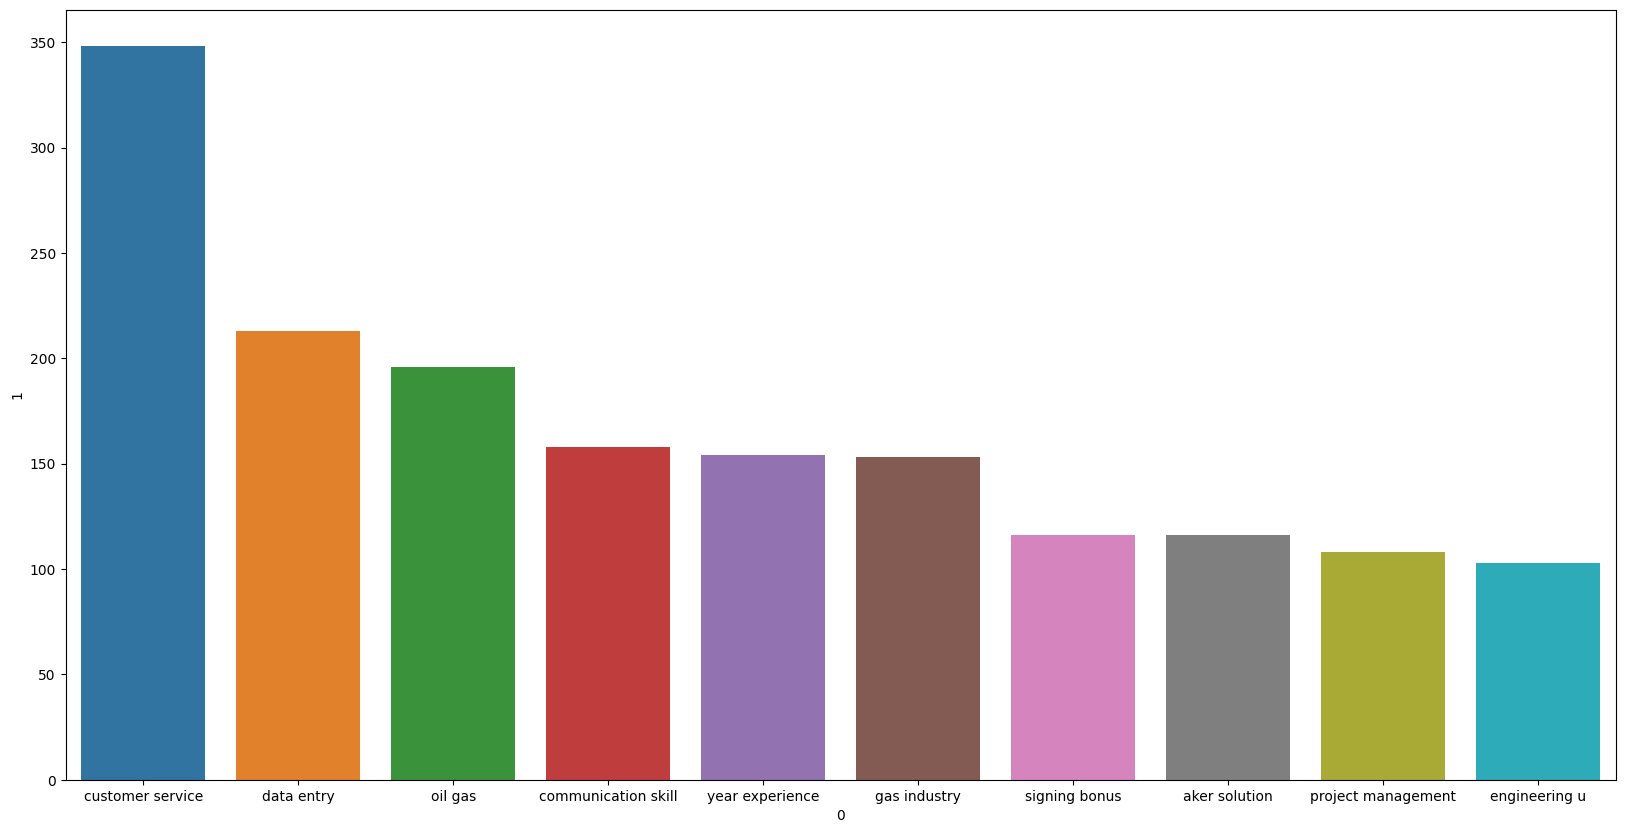

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=fake_postings_2[0][:10],y=fake_postings_2[1][:10])

## **One-Hot-Encoding**




In [ ]:
df_dummies = pd.get_dummies(df[['telecommuting','has_company_logo','has_questions', 'employment_type','required_experience', 'required_education']],
                            columns = ['telecommuting','has_company_logo','has_questions', 'employment_type','required_experience', 'required_education'],
                            prefix = ['telecommuting','has_company_logo','has_questions', 'employment_type','required_experience', 'required_education'],drop_first=True)

In [ ]:
df_dummies.head()

,telecommuting_1,has_company_logo_1,has_questions_1,employment_type_Full-time,employment_type_Not Known,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Director,required_experience_Entry level,...,required_education_High School or equivalent,required_education_Master's Degree,required_education_Not Known,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unspecified,required_education_Vocational,required_education_Vocational - Degree,required_education_Vocational - HS Diploma
0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Tf-Idf Vectorizer

In [ ]:
## Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(lowercase = True ,       ## Lowercasing the text
                             stop_words='english',    ##It doesn't consider english stopwords
                             strip_accents='unicode', ##It removes accents from the text using Unicode normalization
                             analyzer='word',         ##text is tokenized at the word level, meaning that each word in the sentences will be treated as a separate feature in the TF-IDF matrix.
                             max_features=5000,      ## Max features number will be 15000
                             ngram_range=(1, 2),      ## will consider ngrams of 1 and 2
                             sublinear_tf=True,       ##especially useful when dealing with very large or heavily skewed corpora, as it can help in reducing the impact of frequent terms and improving the discriminative power of less frequent terms in the TF-IDF representation
                             smooth_idf=True)         ## handle scenarios where a term appears in all documents or when working with small corpora to avoid division by zero errors and provide more stable IDF calculations.

## Fitting the data
vectorizer.fit(df['combined_text'])

X= vectorizer.transform(df['combined_text'])


In [ ]:
##Let us find the shape of X
X.shape

(17880, 5000)

In [ ]:
## Coverting X to a new dataframe
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [ ]:
## Let us take a glimpse of this new dataframe
tfidf_df.head()

,aan,ab,abc,ability,ability adapt,ability build,ability communicate,ability effectively,ability learn,ability manage,...,youre looking,youth,youtube,youve,youwe,youyou,yr,zealand,zero,zone
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.072758,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.023957,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.116275,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [ ]:
##Concatinating with df_dummies
df_processed = pd.concat([df_dummies,tfidf_df],axis=1)

In [ ]:
df_processed.shape

(17880, 5028)

In [ ]:
##Dropping all the columns that are not needed anymore
df.drop(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
        'combined_text'],axis=1,inplace=True)

In [ ]:
## df should only be left with 'fraudulent'
df.head()

,fraudulent
0,0
1,0
2,0
3,0
4,0


In [ ]:
## The final dataframe
final_df = pd.concat([df_processed,df],axis=1)

In [ ]:
## Dimension of the final dataframe
final_df.shape

(17880, 5029)

In [ ]:
## Defining y
y=final_df['fraudulent']

In [ ]:
y.shape

(17880,)

In [ ]:
## Dropping y from final datframe to get X_
X_ = final_df.drop('fraudulent',axis=1)

In [ ]:
X_.shape

(17880, 5028)

Let us split the data into train and test. This is the last stage of EDA.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_,y,test_size=0.20, random_state=42)

After this we can start with Model building and model evaluation.

In [ ]:
X_.head()

,telecommuting_1,has_company_logo_1,has_questions_1,employment_type_Full-time,employment_type_Not Known,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Director,required_experience_Entry level,...,youre looking,youth,youtube,youve,youwe,youyou,yr,zealand,zero,zone
0,0,1,0,0,0,1,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.072758,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0,1,0,0,1,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.116275,0.0
4,0,1,1,1,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
